<h1><center>Pandas for data cleaning</center></h1>

# First import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fuzzywuzzy import fuzz, process

### Here I have downloaded that data from Datacamp
### Where I have 6 csv files and I will work with them here

##### csv files names:
    ride_sharing_new.csv
    airlines_final.csv
    banking_dirty.csv
    restaurants_L2.csv
    restaurants_L2_dirty.csv
    Bank_Customer.csv

In [2]:
data1 = pd.read_csv('ride_sharing_new.csv',index_col='Unnamed: 0')
data1

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,26
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,27
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,26
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,27
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,27
...,...,...,...,...,...,...,...,...,...,...
25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male,26
25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male,26
25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male,26
25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male,26


### We have to check data types before dealing with the dataframe

In [3]:
data1.dtypes
# look at duration col it is defined as object (which means it is stored as string)
# so if I want to deal with it I have to remove minutes word and change its type to int

duration           object
station_A_id        int64
station_A_name     object
station_B_id        int64
station_B_name     object
bike_id             int64
user_type           int64
user_birth_year     int64
user_gender        object
tire_size           int64
dtype: object

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
 9   tire_size        25760 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.2+ MB


In [5]:
data1['duration'] = data1['duration'].str.strip('minutes')  # this will remove minutes
data1['duration'] = data1['duration'].astype('int')

### Now you can see that duration column has changed !

In [6]:
data1.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size
0,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,26
1,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,27
2,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,26
3,4,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,27
4,11,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,27


### After doing so, now I can deal with that column 
### I will use describe() method to show summary of data 
### And now I can find sum of data using sum() method

In [7]:
print(data1['duration'].describe())
print("\nthis is the sum of the data using sum method :",data1['duration'].sum())

count    25760.000000
mean        11.389053
std         23.500516
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max       1372.000000
Name: duration, dtype: float64

this is the sum of the data using sum method : 293382


### Next thing I noticed from this that user_type col should be categorical
### but it's type is defined as int, so I have to make it categorical 
#### If I didn't so, then used describe() method this will lead to calculate mean and std, which I don't want , but I want to know count so I have to change type first

In [8]:
data1['user_type'] = data1['user_type'].astype('category')
print(data1['user_type'].describe(),'\n')
data1['user_type'].value_counts()

count     25760
unique        3
top           2
freq      12972
Name: user_type, dtype: int64 



2    12972
3     6502
1     6286
Name: user_type, dtype: int64

## sorting according to values

In [9]:
data1.sort_values('duration', ascending=False).head(9)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size
5998,1372,15,San Francisco Ferry Building (Harry Bridges Pl...,30,San Francisco Caltrain (Townsend St at 4th St),1035,2,1967,Male,27
7147,1333,16,Steuart St at Market St,3,Powell St BART Station (Market St at 4th St),1101,1,1967,Male,26
22579,1289,5,Powell St BART Station (Market St at 5th St),368,Myrtle St at Polk St,5185,1,1979,Male,26
24244,1047,81,Berry St at 4th St,49,S Park St at 3rd St,2105,1,1963,Male,26
21129,923,15,San Francisco Ferry Building (Harry Bridges Pl...,368,Myrtle St at Polk St,5137,2,1992,Male,26
9524,891,5,Powell St BART Station (Market St at 5th St),39,Scott St at Golden Gate Ave,4825,2,1990,Male,26
1290,856,67,San Francisco Caltrain Station 2 (Townsend St...,61,Howard St at 8th St,4936,1,1971,Female,27
1670,663,16,Steuart St at Market St,14,Clay St at Battery St,746,1,1962,Female,27
3029,556,30,San Francisco Caltrain (Townsend St at 4th St),67,San Francisco Caltrain Station 2 (Townsend St...,1070,2,1975,Female,27


## Deal with out of range Data
### you can:
    -Drop data
    -set custom min and max
    -treat as missing and impute
    -set custom values depending on buisness assumptions

### Note that:

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

So now I have to clean data with tyres > 27,
<br>
I can do that by many ways like droping rows or replacing them.
<br>
but it will be better to replace thim so I will replace any tire with size > 27 to be 27


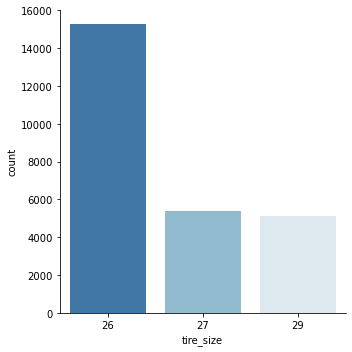

In [10]:
sns.set_palette('RdBu_r')
graph = sns.catplot(x='tire_size',data=data1,kind='count')
plt.show()
# I want to remove 29

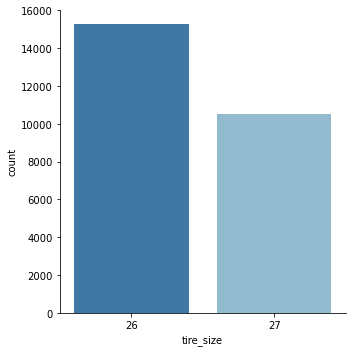

In [11]:
more_than_27 = data1['tire_size'] > 27   # this will return true for data > 27
data1.loc[more_than_27, 'tire_size'] = 27
# I replaced True values to be 27 instead of more than that so my data won't be more than 27 now
sns.catplot(x='tire_size',data=data1,kind='count')
plt.show()
# look at the shape now I made it only 29, 27

## Dealing with dates

In [12]:
data2 = pd.read_csv('banking_dirty.csv', index_col='Unnamed: 0')
data2

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,6/9/1962,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2/9/2018,22-02-19
1,166B05B0,12/16/1962,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,9/12/1990,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,2/4/2018
3,F2158F66,11/3/1985,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,7/11/2017,8/11/2018
4,7A73F334,5/17/1990,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...
95,CA507BA1,8/10/1974,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-28,11/9/2019
96,B99CD662,12/12/1989,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,4/5/2017,12/3/2019
97,13770971,11/29/1984,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,93E78DA3,12/14/1969,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,9/10/2017,15-04-18


In [13]:
data2.info()
# note that account_opened, last_transaztion columns are unclean 
# and they are considered as objects and I want them as dates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           100 non-null    object 
 1   birth_date        100 non-null    object 
 2   Age               100 non-null    int64  
 3   acct_amount       100 non-null    float64
 4   inv_amount        100 non-null    int64  
 5   fund_A            100 non-null    float64
 6   fund_B            100 non-null    float64
 7   fund_C            100 non-null    float64
 8   fund_D            100 non-null    float64
 9   account_opened    100 non-null    object 
 10  last_transaction  100 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 9.4+ KB


In [14]:
data2['account_opened'] = pd.to_datetime(data2['account_opened'], errors='coerce').dt.date
data2['last_transaction'] = pd.to_datetime(data2['last_transaction'], errors='coerce').dt.date
# errors = coerce will make it return nan values for values that can't be converted
data2.head()
# now look at the dates :)

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,6/9/1962,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22
1,166B05B0,12/16/1962,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31
2,BFC13E88,9/12/1990,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04
3,F2158F66,11/3/1985,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11
4,7A73F334,5/17/1990,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19


### Now I want check that there is no dates in the dataframe greater than today's date, because that means an error in the data collection here (how can someone have used his account in the future ?!)

In [15]:
today = dt.date.today()   ## this will return today's date (which will be the date that I made the notebook in)
data2[['account_opened']][data2['account_opened'] > today]
# I can see some future dates which I have to clean

,account_opened
11,2027-05-06
41,2037-05-12
95,2028-05-26


In [16]:
data2[['last_transaction']][data2['last_transaction'] > today]
# I can see some future dates which I have to clean

,last_transaction
92,2030-01-16


#### Here I will chose to drop this data

In [17]:
data2 = data2[data2['account_opened'] < today]
data2 = data2[data2['last_transaction'] < today]
## I droped using filtering  
## now it is cleaned

## Duplicates
##### What if I have duplicated data in the dataframe, this duplicates either can be complete duplicates or incomplete ones, first complete duplicates has to be removed, while incomplete : we have to know why and deal with
##### To find complete duplicate data we use duplicated() method, and it has a parameter called subset which is used to choose from columns and then we use keep parameter, where keep =   'first' or 'last' or False

In [18]:
my_duplicates = data1.duplicated(keep='first')
data1[my_duplicates]

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size
604,9,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male,27
20170,4,21,Montgomery St BART Station (Market St at 2nd St),343,Bryant St at 2nd St,5034,2,1993,Male,26


In [19]:
my_duplicates_bike_id = data1.duplicated(subset=['bike_id', 'station_A_id', 'station_B_id', 'duration'])
data1[my_duplicates_bike_id]

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_size
529,1,5,Powell St BART Station (Market St at 5th St),5,Powell St BART Station (Market St at 5th St),4706,1,1992,Female,27
604,9,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male,27
1258,2,81,Berry St at 4th St,364,China Basin St at 3rd St,1768,1,1981,Male,27
2353,8,81,Berry St at 4th St,23,The Embarcadero at Steuart St,2584,1,1984,Male,27
3042,8,67,San Francisco Caltrain Station 2 (Townsend St...,363,Salesforce Transit Center (Natoma St at 2nd St),3369,3,1978,Male,27
...,...,...,...,...,...,...,...,...,...,...
25131,5,5,Powell St BART Station (Market St at 5th St),58,Market St at 10th St,5082,2,1987,Female,26
25449,1,15,San Francisco Ferry Building (Harry Bridges Pl...,15,San Francisco Ferry Building (Harry Bridges Pl...,2807,3,1991,Male,26
25469,6,5,Powell St BART Station (Market St at 5th St),64,5th St at Brannan St,1683,3,1983,Male,26
25506,1,15,San Francisco Ferry Building (Harry Bridges Pl...,15,San Francisco Ferry Building (Harry Bridges Pl...,2807,1,1960,Male,26


In [20]:
## I can also use drop_duplicates() method
data1.drop_duplicates(subset=['bike_id', 'station_A_id', 'station_B_id', 'duration'], keep='first', inplace=True)

### groupby and agg method

#### first I will use this data to group on :

In [21]:
data3 = pd.read_csv('restaurants_L2.csv', index_col='Unnamed: 0')
data3

,name,addr,city,phone,type,Age,experience
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american,20,10
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american,19,9
2,campanile,624 s. la brea ave.,los angeles,2139381447,american,33,23
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american,32,22
4,grill on the alley,9560 dayton way,los angeles,3102760615,american,12,2
...,...,...,...,...,...,...,...
331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian,34,24
332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian,34,24
333,world wrapps,2257 chestnut st.,san francisco,4155639727,american,34,24
334,wu kong,101 spear st.,san francisco,4159579300,asian,34,24


In [22]:
data3['type'].value_counts()

american        137
italian          78
asian            72
coffeebar        25
mexican           9
southern          8
steakhouses       5
southwestern      1
cajun             1
Name: type, dtype: int64

In [23]:
column_names = ['city']
summaries = {'Age':'mean','experience':'max'}
grouped_data3 = data3.groupby(by = column_names).agg(summaries)
grouped_data3

,Age,experience
city,,
atlanta,29.181818,21
beverly hills,33.000000,33
brooklyn,23.000000,13
hollywood,32.000000,22
las vegas,28.650000,20
los angeles,34.075000,41
los feliz,44.000000,34
new york,36.450867,57
pacific palisades,17.000000,7


## Value consistency

In [24]:
data4 = pd.read_csv('airlines_final.csv', index_col='Unnamed: 0')
data4

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


In [25]:
print('unique values of dest_region:\n', data4['dest_region'].unique(),'\n')
print('unique values of dest_size:\n', data4['dest_size'].unique())
## look at unique values it is unclean where due to spaces and captilization there is unclean data
## I will add countplot to help to visualize

unique values of dest_region:
 ['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east'] 

unique values of dest_size:
 ['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


## Look at graph's x-axis and you will see the problem

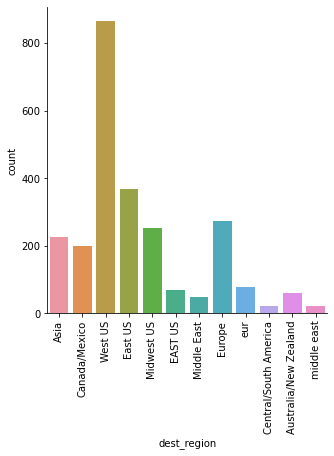

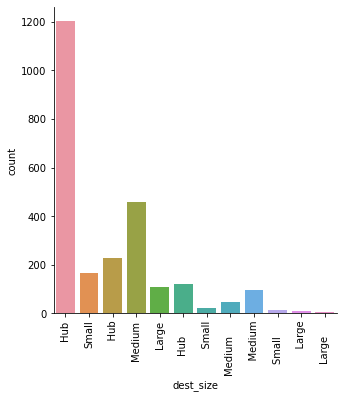

In [26]:
sns.catplot(x='dest_region',data=data4,kind='count')
plt.xticks(rotation=90)
plt.show()
# there is 2 middle east for example
sns.catplot(x='dest_size',data=data4,kind='count')
plt.xticks(rotation=90)
plt.show()

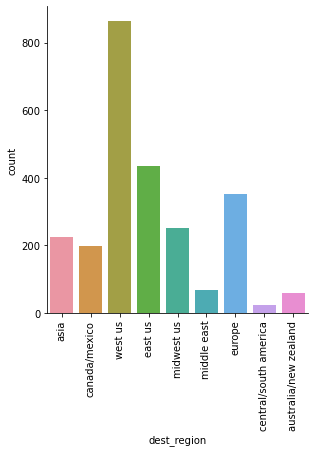

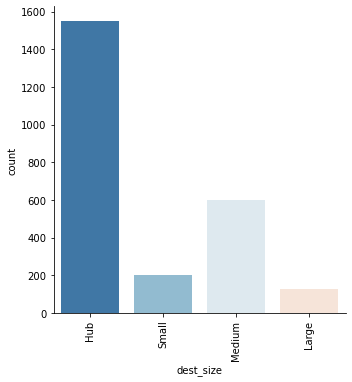

In [27]:
data4['dest_region'] = data4['dest_region'].str.lower()  # I noticed that there is a problem cuz of capitle words
data4['dest_region'] = data4['dest_region'].replace('eur','europe') # there is eur which means europe
# now the data is clean I will plot it
sns.catplot(x='dest_region',data=data4,kind='count')
plt.xticks(rotation=90)
plt.show()

data4['dest_size'] = data4['dest_size'].str.strip()   # the problem because of spaces
# now the data is clean I will plot it
sns.catplot(x='dest_size',data=data4,kind='count')
plt.xticks(rotation=90)
plt.show()

## Collapsing data into categories
### here we may use qcut or cut methods to do so.... <br> if I want to divid data without group names we use qcut if not then I will use cut

In [28]:
label_names = ['short', 'medium', 'long']
data4['my_qcuts'] = pd.qcut(data4['wait_min'], q = 3,labels = label_names)
data4
# look ! there is a new col added named my_qcuts

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,my_qcuts
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,short
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,short
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,1475,Tuesday,ALASKA,NEW YORK-JFK,east us,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified,long
2805,2222,Thursday,SOUTHWEST,PHOENIX,west us,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied,medium
2806,2684,Friday,UNITED,ORLANDO,east us,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied,short
2807,2549,Tuesday,JETBLUE,LONG BEACH,west us,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied,short


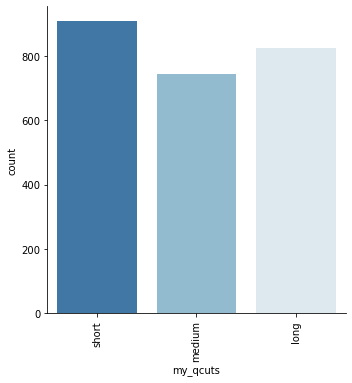

In [29]:
sns.catplot(x='my_qcuts',data=data4,kind='count')
plt.xticks(rotation=90)
plt.show()

## Cross field validation
### it is use of multiple fields in data to check validity

In [30]:
# I will show the example on data2
data2

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,6/9/1962,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22
1,166B05B0,12/16/1962,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31
2,BFC13E88,9/12/1990,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04
3,F2158F66,11/3/1985,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11
4,7A73F334,5/17/1990,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,2018-07-19
...,...,...,...,...,...,...,...,...,...,...,...
94,A731C34E,6/3/1961,59,95352.02,84065,12061.0,15742.0,35725.0,20537.0,2017-11-13,2019-01-13
96,B99CD662,12/12/1989,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,2019-12-03
97,13770971,11/29/1984,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,2019-04-24
98,93E78DA3,12/14/1969,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,2018-04-15


### here sum of fund_A, fund_B, fund_C, fund_D should be equal to inv_amount or this will be an error

In [31]:
funds = data2[['fund_A','fund_B','fund_C','fund_D']]
funds
# the rows sum must be equal to inv_income

,fund_A,fund_B,fund_C,fund_D
0,30105.0,4138.0,1420.0,15632.0
1,4995.0,938.0,6696.0,2421.0
2,10323.0,4590.0,8469.0,1185.0
3,3908.0,492.0,6482.0,12830.0
4,12158.4,51281.0,13434.0,18383.0
...,...,...,...,...
94,12061.0,15742.0,35725.0,20537.0
96,2453.0,7892.0,31486.0,7258.0
97,3352.0,7547.0,8486.0,8577.0
98,1758.0,11174.0,11650.0,5080.0


In [32]:
sum_fund = funds.sum(axis=1) # sum of funds
sum_fund

0     51295.0
1     15050.0
2     24567.0
3     23712.0
4     95256.4
       ...   
94    84065.0
96    49089.0
97    27962.0
98    29662.0
99    32149.0
Length: 96, dtype: float64

In [33]:
data2[sum_fund != data2['inv_amount']]
## this means that this values are false !
## we can either modify or drop 
## next I will drop them

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
4,7A73F334,5/17/1990,30,120512.00,93230,12158.40,51281.00,13434.00,18383.00,2018-05-14,2018-07-19
12,EEBD980F,11/20/1990,34,57838.49,50812,18314.00,1477.00,29049.48,5539.00,2018-08-12,2020-04-01
22,96525DA6,11/23/1992,28,82511.24,33927,8206.00,15019.00,5559.60,6182.00,2018-07-23,2018-07-08
43,38B8CD9C,6/25/1970,50,28834.71,27531,314.00,6072.28,14163.00,7908.00,2018-09-17,2020-05-02
47,68C55974,7/8/1962,58,95038.14,66796,33764.00,5042.00,10659.00,19237.41,2018-03-04,2018-09-25
65,0A9BA907,9/21/1966,54,90469.53,70171,28615.00,21720.05,11906.00,10763.00,2018-06-15,2018-08-28
89,C580AE41,6/1/1968,52,96673.37,68466,8489.36,28592.00,2439.00,30419.00,2018-09-28,2018-09-17


In [34]:
data2.loc[~(sum_fund != data2['inv_amount'])]
## what I did here is that I used ~ that return values that is false
## I said return true from wrong data from here --> sum_fund != data2['inv_amount']
## And then I printed the correct data by using ~

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,6/9/1962,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,2019-02-22
1,166B05B0,12/16/1962,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,2018-10-31
2,BFC13E88,9/12/1990,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,2018-02-04
3,F2158F66,11/3/1985,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,2018-08-11
5,472341F2,2/23/1980,40,83127.65,67960,12686.0,19776.0,23707.0,11791.0,2018-12-14,2018-04-22
...,...,...,...,...,...,...,...,...,...,...,...
94,A731C34E,6/3/1961,59,95352.02,84065,12061.0,15742.0,35725.0,20537.0,2017-11-13,2019-01-13
96,B99CD662,12/12/1989,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,2017-04-05,2019-12-03
97,13770971,11/29/1984,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,2017-08-16,2019-04-24
98,93E78DA3,12/14/1969,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,2017-09-10,2018-04-15


## Dealing with nan values
### For that I will use another dataset I have which got nan values

In [35]:
data5 = pd.read_csv('Bank_Customer.csv')
data5

,age,job,marital,education,balance,duration
0,58.0,management,married,tertiary,2143,261
1,44.0,technician,single,secondary,29,151
2,33.0,entrepreneur,married,secondary,2,76
3,47.0,blue-collar,married,unknown,1506,92
4,33.0,unknown,single,unknown,1,198
...,...,...,...,...,...,...
1085,NaN,admin.,married,primary,136,283
1086,NaN,blue-collar,single,unknown,2167,1273
1087,NaN,blue-collar,married,secondary,309,1574
1088,NaN,technician,married,secondary,221,139


In [36]:
data5.isna().sum()
## age got 90 nan value
## I can either drop them or fill them

age          90
job           0
marital       0
education     0
balance       0
duration      0
dtype: int64

In [37]:
mean_age = data5['age'].mean()
data5['age'].fillna(mean_age, inplace=True)
# or there is many filling methods

In [38]:
data5.isna().sum()
## now no missing data

age          0
job          0
marital      0
education    0
balance      0
duration     0
dtype: int64

<h1><center>This is the end of pandas for cleaning syntax notebook</center></h1>
<h1><center>There is another Notebooks on other things for python</center></h1>
<h1><center>But in the end... check the documentation for more!</center></h1>